ModuleNotFoundError: No module named 'tensorflow'

In [6]:
!pip install tensorflow


Epoch 1/20


C:\Users\heman\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2140 - val_loss: 0.0515
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0393 - val_loss: 0.0146
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0153 - val_loss: 0.0106
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - val_loss: 0.0063
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064 - val_loss: 0.0054
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052 - val_loss: 0.0053
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0057 - val_lo

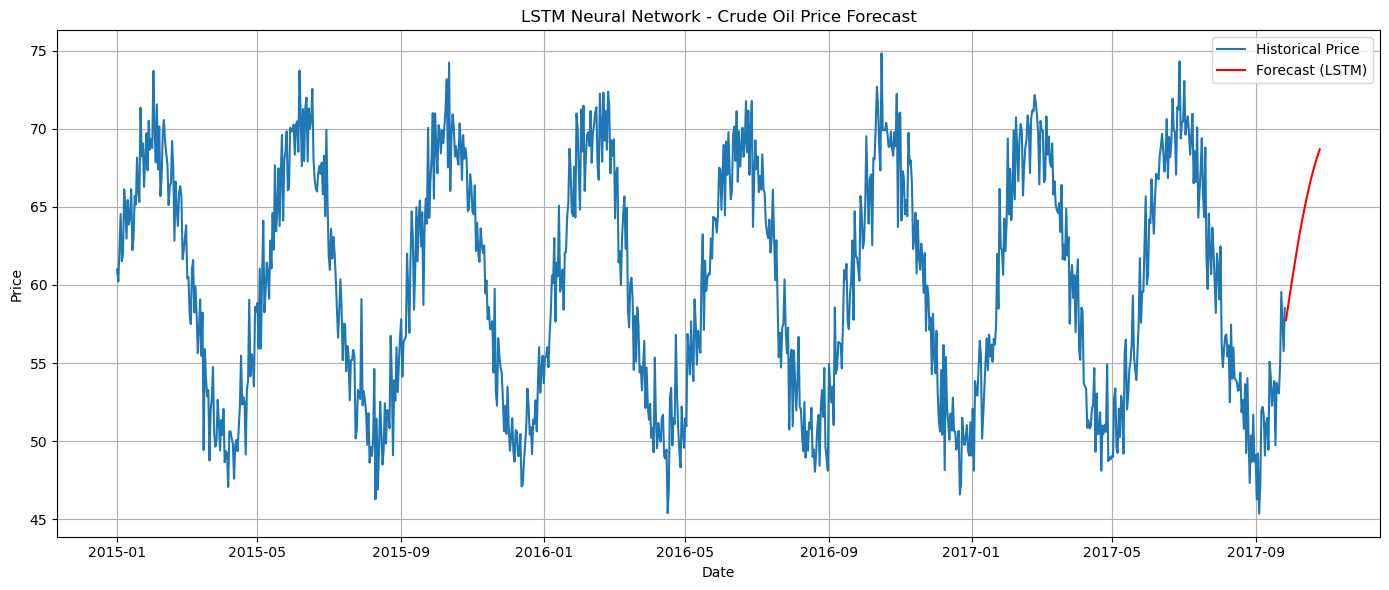

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Step 1: Create Synthetic Crude Oil Price Data
np.random.seed(42)
days = 1000
dates = pd.date_range(start='2015-01-01', periods=days)
prices = 60 + np.sin(np.linspace(0, 50, days)) * 10 + np.random.normal(0, 2, days)

df = pd.DataFrame({'Date': dates, 'Price': prices})
df.set_index('Date', inplace=True)

# Step 2: Normalize data
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(df[['Price']])

# Step 3: Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = create_sequences(scaled_prices, sequence_length)

# Step 4: Split into train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Step 6: Train model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

# Step 7: Predict future
n_future = 30
last_sequence = scaled_prices[-sequence_length:]
forecast = []

input_seq = last_sequence.reshape(1, sequence_length, 1)
for _ in range(n_future):
    next_pred = model.predict(input_seq)[0][0]
    forecast.append(next_pred)
    input_seq = np.append(input_seq[:, 1:, :], [[[next_pred]]], axis=1)

# Inverse transform forecast
forecast_prices = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Step 8: Plotting
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_future)
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Price'], label="Historical Price")
plt.plot(forecast_dates, forecast_prices, label="Forecast (LSTM)", color='red')
plt.title("LSTM Neural Network - Crude Oil Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
